In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mpb
import re 

from collections import  Counter
from textblob import TextBlob,Word


In [52]:
covid_19 = pd.read_csv('vaccine_original.csv', encoding = "ISO-8859-1")
covid_19.head()

,date,username,tweet,Emotion,mentions,replies_count,retweets_count,likes_count,link,reply_to
0,2021/4/8 0:59,dholuod,@WanjiraLeah @NationBreaking 1. LIGHTHOUSE ...,Netural,[],0,0,0,https://twitter.com/DholuoD/status/13799470809...,"[{'screen_name': 'WanjiraLeah', 'name': 'leah ..."
1,2021/4/8 0:59,johnndavis,20210407: Sharon Kirkey: ¡®First-dose-first¡¯:...,Netural,[],0,0,0,https://twitter.com/johnndavis/status/13799470...,[]
2,2021/4/8 0:59,msnashville,Experts Explain What Happens If You Skip Your ...,Netural,[],0,0,0,https://twitter.com/MsNashville/status/1379947...,[]
3,2021/4/8 0:59,samhealth,"There are three COVID-19 vaccines available, a...",Netural,[],0,0,1,https://twitter.com/SamHealth/status/137994699...,[]
4,2021/4/8 0:59,benreidy_3,I¡¯d rather contract COVID-19 than get the vac...,Netural,[],0,0,7,https://twitter.com/benreidy_3/status/13799469...,[]


In [53]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91709 entries, 0 to 91708
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            91709 non-null  object
 1   username        91708 non-null  object
 2   tweet           91709 non-null  object
 3   Emotion         91709 non-null  object
 4   mentions        91709 non-null  object
 5   replies_count   91709 non-null  int64 
 6   retweets_count  91709 non-null  int64 
 7   likes_count     91709 non-null  int64 
 8   link            91709 non-null  object
 9   reply_to        91709 non-null  object
dtypes: int64(3), object(7)
memory usage: 7.0+ MB


In [54]:
covid_19.describe()

## Here we an first information that shows that the mean of replies and retweets made are smaller than likes (which is understandable). 

,replies_count,retweets_count,likes_count
count,91709.000000,91709.000000,91709.000000
mean,1.311420,3.393854,14.404246
std,27.404961,75.937424,441.056155
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,2.000000
max,6501.000000,16487.000000,91869.000000


In [55]:
## Lets see check the tweet with 6501 replies.

covid_19[covid_19['replies_count']==6501]

## It appears that the tweet with most replies is also the tweet carrying the most retweets and likes. 

,date,username,tweet,Emotion,mentions,replies_count,retweets_count,likes_count,link,reply_to
64837,2021/4/2 18:07,govrondesantis,Today I issued an executive order prohibiting ...,Netural,[],6501,16487,91869,https://twitter.com/GovRonDeSantis/status/1378...,[]


In [56]:
covid_19['tweet'].unique()

array(['@WanjiraLeah @NationBreaking 1.   LIGHTHOUSE  What exactly do you mean?  To "investigate" does not mean that Tanzania\'s President admits that there is COVID-19 or that if it exists then vaccines should be used instead of ALTERNATIVE CURES.  Do not underestimate Madame Hassan\'s wisdom.  She is a wise woman.',
       '20210407: Sharon Kirkey: ¡®First-dose-first¡¯: Panel reassures Canadians 16 weeks between COVID-19 vaccine shots is safe ["Critics say the strategy is a risky, population-level experiment in Canada"',
       'Experts Explain What Happens If You Skip Your Second COVID-19 Vaccine  https://t.co/GP3oacpSoR',
       ...,
       "Pennsylvania is opening up COVID-19 vaccine eligibility to all adults, but Philadelphia won't be included because it has its own vaccine plans  https://t.co/OSihVvMSWN",
       "A batch of Johnson &amp; Johnson's COVID-19 vaccine failed quality standards and can't be used, the drug giant said, without specifying how many doses were lost. It was

In [57]:
## Lets dive deep into the tweets of this dataset.

#covid_19['tweet'].str.len()

covid_19['tweet'].str.len().mean()

## The mean of characters of each tweet is 180. 

180.28209881254838

<AxesSubplot:>

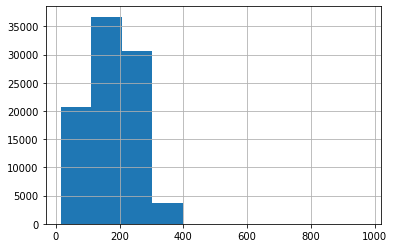

In [58]:
covid_19['tweet'].str.len().hist()

## The chart confirms the finding that the majority of tweets are around the 180 character range.

In [59]:
## Lets now see how many words each tweet has.

#covid_19['tweet'].str.split().map(lambda x: len(x))

covid_19['tweet'].str.split().map(lambda x: len(x)).mean()

## 25 words are the mean of all tweets.

25.316904556804676

<AxesSubplot:>

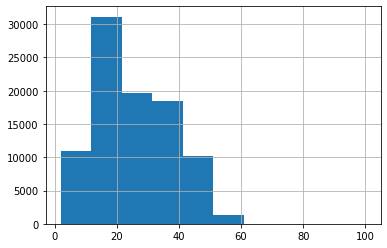

In [60]:
covid_19['tweet'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

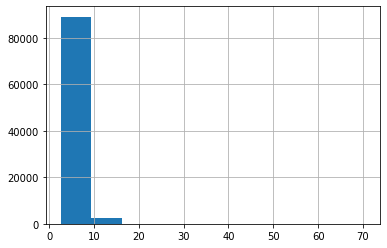

In [61]:
## Qual o tamanho medio de palavras de cada tweet.

covid_19['tweet'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()


In [62]:
## Lets look a little bit to stop words.

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Magalhaes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

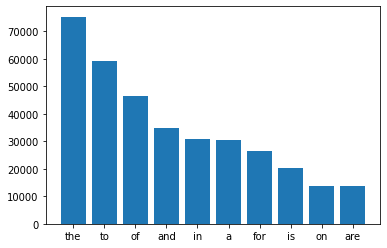

In [63]:
corpus=[]
new = covid_19['tweet'].str.split()
new = new.values.tolist() 
corpus=[word for i in new for word in i] 

from collections import defaultdict
dic = defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word]+=1 
top= sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)

mpb.bar(x,y)

## We can see that the most commons stop word are "the", "to", and "of".

<AxesSubplot:>

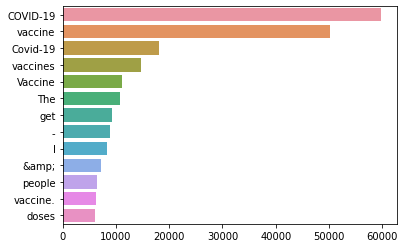

In [64]:
## Lets check the most common words.

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

## As expected, words related to disease and vaccines are the most common.  

In [67]:
## Lets see more about this "Emotion" variable.

covid_19['Emotion'].unique()

## So it appears that the Emotion can be Neutral, Positve or Negative.

array(['Netural', 'Positive', 'Negative'], dtype=object)

In [75]:
## Lets check which one of them appears the most. 

covid_19.groupby("Emotion").size().sort_values(ascending=False)

## It appears that most comments are neutral. 

Emotion
Netural     68699
Positive    16936
Negative     6074
dtype: int64

<AxesSubplot:xlabel='Emotion'>

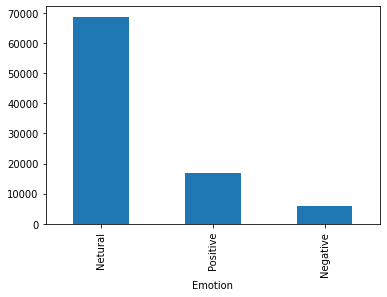

In [78]:
covid_19.groupby("Emotion").size().sort_values(ascending=False).plot(kind="bar")

In [86]:
## Lets subset the negative tweets to see the most common words.

Ngt = covid_19[covid_19.Emotion== "Negative"]
Ngt.head()

,date,username,tweet,Emotion,mentions,replies_count,retweets_count,likes_count,link,reply_to
7,2021/4/8 0:58,bugattisb4babyz,adult human females who use neopronouns are st...,Negative,[],0,6,17,https://twitter.com/bugattisb4babyz/status/137...,[]
11,2021/4/8 0:58,thecollegian,Students express mixed reactions to the univer...,Negative,[],1,2,5,https://twitter.com/TheCollegian/status/137994...,[]
63,2021/4/8 0:52,jmnualla,European drug regulators have confirmed a link...,Negative,"[{'screen_name': 'cnnphilippines', 'name': 'cn...",0,0,0,https://twitter.com/jmnualla/status/1379945308...,[]
83,2021/4/8 0:49,pressnewsagency,AstraZeneca¡¯s COVID-19 vaccine is tied to unc...,Negative,[],0,0,0,https://twitter.com/PressNewsAgency/status/137...,[]
100,2021/4/8 0:47,planck_epoch,AstraZeneca¡¯s COVID-19 vaccine is tied to unc...,Negative,[],0,0,0,https://twitter.com/Planck_Epoch/status/137994...,[]


<AxesSubplot:>

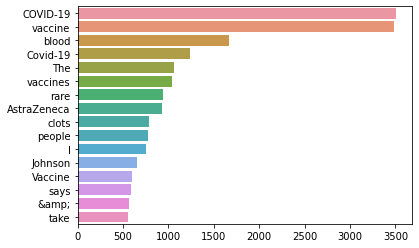

In [90]:
## Lets check the most common words.

corpus=[]
new = Ngt['tweet'].str.split()
new = new.values.tolist() 
corpus=[word for i in new for word in i] 

dic = defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word]+=1 
top= sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)


## The most common words are similar to the whole dataset, which means the negative sentment is not well defined by specific words. 

<AxesSubplot:>

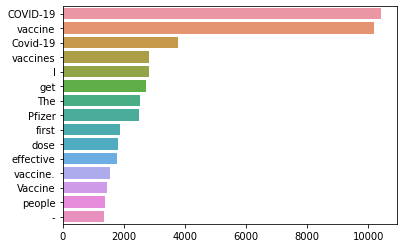

In [91]:
## Now for positive ones.

Pst = covid_19[covid_19.Emotion== "Positive"]
Pst.head()

corpus=[]
new = Pst['tweet'].str.split()
new = new.values.tolist() 
corpus=[word for i in new for word in i] 

dic = defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word]+=1 
top= sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)


In [97]:
## Sentiment analysis.

def polarity(x):
    return TextBlob(x).sentiment[0]

<AxesSubplot:>

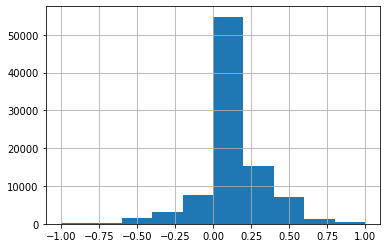

In [98]:
sentiments = covid_19['tweet'].apply(lambda x: polarity(x))
sentiments.hist()

In [103]:
sentiments.mean()

0.10035458859443382